# Задание 1

In [1]:
import autograd.numpy as np
from scipy.optimize import minimize

In [2]:
with np.load('data_89.npz') as data:
    A2, y2 = data['A2'], data['y2']

In [3]:
def f(x, a):
  e = np.exp(a[0] + x @ a[1:])
  return 1 / (e + 1)

def target(a):
  return np.sum((f(A2, a) - y2) ** 2)

In [4]:
result = minimize(target, np.random.random(11))
print(result.message)
print('\na =', result.x)
print('\ntarget(a) =', target(result.x))

Optimization terminated successfully.

a = [ 0.58399346  0.32173976 -0.1135061   1.99867791 -0.31950997 -0.28388097
 -0.35960309 -0.02188886  0.00987748  1.5332876  -0.59548832]

target(a) = 0.043552775905373486


# Задание 2

In [5]:
from autograd import grad

In [6]:
gamma = 0.01

In [7]:
def autograd(max_iter=10000):
  n_iter = 0
  a = np.random.rand(11)
  grad_target = grad(target)
  
  while True:
    n_iter += 1
    new_a = a - gamma * grad_target(a)
    
    if np.linalg.norm(new_a - a) < 1e-6 or n_iter > max_iter:
      break
    
    a = new_a
  
  return new_a  

In [8]:
a = autograd()
print('a =', a)
print('\ntarget(a) =', target(a))

a = [ 0.33027256  0.26326169 -0.01038574  1.95299268 -0.14326787 -0.30571338
 -0.26057924 -0.17266169  0.10436446  1.58070796 -0.60518055]

target(a) = 0.04385256341127128


In [9]:
def mygrad_target(a):
  grad = np.zeros_like(a)

  for i in range(len(a)):
    h = np.zeros_like(a)
    h[i] = 1e-8
    grad[i] = (target(a + h) - target(a)) / 1e-8

  return grad

def mygrad(max_iter=10000):
  n_iter = 0
  a = np.random.rand(11)
  
  while True:
    n_iter += 1
    new_a = a - gamma * mygrad_target(a)
    
    if np.linalg.norm(new_a - a) < 1e-6 or n_iter > max_iter:
      break
    
    a = new_a
  
  return new_a  

In [10]:
a = mygrad()
print('a =', a)
print('\ntarget(a) =', target(a))

a = [ 3.03385622e-01  2.56866564e-01  2.41968394e-04  1.94917542e+00
 -1.24215534e-01 -3.08090936e-01 -2.50855167e-01 -1.88685699e-01
  1.14040969e-01  1.58606260e+00 -6.06444661e-01]

target(a) = 0.043923600776904194


# Задание 3

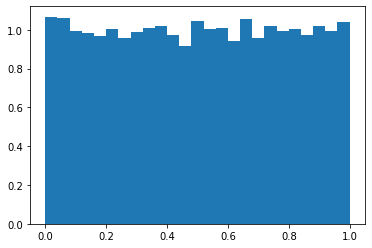

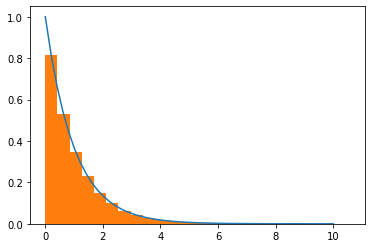

In [11]:
import matplotlib.pyplot as plt

lam = 1
n = 20000
n_bins = 25
uniform = np.random.random(n)
exponential = -np.log(1 - uniform) / lam

plt.hist(uniform, bins = n_bins, density = True)
plt.show()
print()

xx = np.linspace(0, 10)
yy = lam * np.exp(-lam * xx)
plt.plot(xx, yy)
plt.hist(exponential, bins = n_bins, density = True)
plt.show()

In [12]:
F = lambda x: 1 - np.exp(-lam * x)

N, bins = np.histogram(exponential, bins = n_bins)

p = F(bins[1:]) - F(bins[:-1])
expected = p * n
S = (N - expected) ** 2 / expected
chi = np.sum(S)
print(chi)

13.88387266377708


	35.17246

# Задание 4

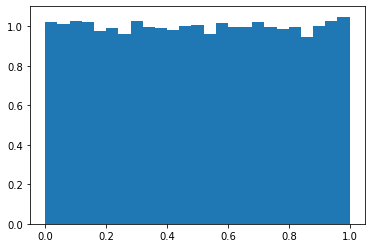

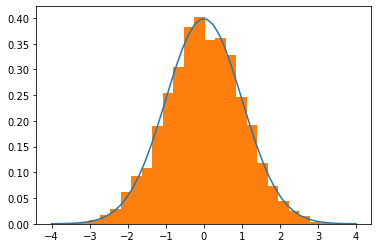

In [13]:
import matplotlib.pyplot as plt

lam = 1
n = 30000
n_bins = 25
uniform = np.random.random(n)
exponential = -np.log(1 - uniform) / lam

plt.hist(uniform, bins = n_bins, density = True)
plt.show()
print()

uniform = (uniform - 1) * 2
u = uniform[:n//2]
v = uniform[n//2:]
s = u ** 2 + v ** 2

flags = np.logical_and(s != 0, s < 1)
u, v, s = u[flags], v[flags], s[flags]

u *= np.sqrt(-2 * np.log(s)/s)
v *= np.sqrt(-2 * np.log(s)/s)

normal = np.append(u, -v)

xx = np.linspace(4, -4)
yy = np.exp(-xx**2 / 2) / np.sqrt(2*np.pi)
plt.plot(xx, yy)
plt.hist(normal, bins = n_bins, density = True)
plt.show()

In [14]:
from scipy.stats import norm

F = lambda x: norm.cdf(x)

n = normal.shape[0]
N, bins = np.histogram(normal, bins = n_bins)

p = F(bins[1:]) - F(bins[:-1])
expected = p * n
S = (N - expected) ** 2 / expected
chi = np.sum(S)
print(chi)

29.76035023649402


	35.17246